# **Tsfresh (Time Series Feature Extraction Based on Scalable Hypothesis Tests)**

The Python package under consideration constitutes an automatic tool that computes and removes multiple time series characteristics that are utilized for undertaking classification and regression assignments. Consequently, the library under consideration is primarily utilized for the purpose of facilitating feature engineering in time series quandaries alongside the employment of supplementary packages such as sklearn for the purpose of scrutinizing time series. 

The present study will utilize a conventional dataset encompassing air travelers over an 11-year period, from 1949 through 1960. The present dataset consists of monthly aggregate figures of passengers utilizing airlines based in the United States.

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [4]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute, make_forecasting_frame
from tsfresh.feature_extraction import ComprehensiveFCParameters, settings

In [5]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
# Reading the data
data = pd.read_csv('airline-passengers.csv')

--2023-04-10 13:00:55--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-04-10 13:00:56 (46.6 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [6]:
data.shape

(144, 2)

In [7]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data.dtypes

Month         object
Passengers     int64
dtype: object

In [9]:
data.columns = ['month','#Passengers']
data['month'] = pd.to_datetime(data['month'],infer_datetime_format=True,format='%y%m')

df_pass, y_air = make_forecasting_frame(data["#Passengers"], kind="#Passengers", max_timeshift=12, rolling_direction=1)
print(df_pass)

Rolling: 100%|██████████| 144/144 [00:00<00:00, 433.45it/s]

             id  time  value         kind
1       (id, 1)     0    112  #Passengers
3       (id, 2)     0    112  #Passengers
4       (id, 2)     1    118  #Passengers
6       (id, 3)     0    112  #Passengers
7       (id, 3)     1    118  #Passengers
...         ...   ...    ...          ...
1788  (id, 143)   138    622  #Passengers
1789  (id, 143)   139    606  #Passengers
1790  (id, 143)   140    508  #Passengers
1791  (id, 143)   141    461  #Passengers
1792  (id, 143)   142    390  #Passengers

[1650 rows x 4 columns]


In [10]:
extraction_settings = ComprehensiveFCParameters()
features = extract_features(df_pass, column_id="id", column_sort="time", column_value="value", impute_function=impute,
                     show_warnings=False,
                     default_fc_parameters=extraction_settings
                     )

Feature Extraction: 100%|██████████| 143/143 [00:07<00:00, 19.87it/s]


In [11]:
features

value__variance_larger_than_standard_deviation  \
id 1                                               0.0   
   2                                               1.0   
   3                                               1.0   
   4                                               1.0   
   5                                               1.0   
...                                                ...   
   139                                             1.0   
   140                                             1.0   
   141                                             1.0   
   142                                             1.0   
   143                                             1.0   

        value__has_duplicate_max  value__has_duplicate_min  \
id 1                         0.0                       0.0   
   2                         0.0                       0.0   
   3                         0.0                       0.0   
   4                         0.0                       0.0   
   5                         0.0                       0.0   
...                          ...                       ...   
   139                       0.0                       0.0   
   140                       0.0                       0.0   
   141                       0.0                       0.0   
   142                       0.0                       0.0   
   143                       0.0                       0.0   

        value__has_duplicate  value__sum_values  value__abs_energy  \
id 1                     0.0              112.0            12544.0   
   2                     0.0              230.0            26468.0   
   3                     0.0              362.0            43892.0   
   4                     0.0              491.0            60533.0   
   5                     0.0              612.0            75174.0   
...                      ...                ...                ...   
   139                   0.0             5513.0          2598313.0   
   140                   0.0             5560.0          2653068.0   
   141                   0.0             5605.0          2696763.0   
   142                   1.0             5659.0          2743635.0   
   143                   1.0             5687.0          2764691.0   

        value__mean_abs_change  value__mean_change  \
id 1                 22.363636            2.272727   
   2                  6.000000            6.000000   
   3                 10.000000           10.000000   
   4                  7.666667            5.666667   
   5                  7.750000            2.250000   
...                        ...                 ...   
   139               46.272727            5.727273   
   140               39.000000           13.000000   
   141               42.818182            9.181818   
   142               43.000000            9.000000   
   143               45.545455           -1.363636   

        value__mean_second_derivative_central  value__median  ...  \
id 1                                -0.500000          112.0  ...   
   2                                -0.500000          115.0  ...   
   3                                 4.000000          118.0  ...   
   4                                -2.250000          123.5  ...   
   5                                -2.333333          121.0  ...   
...                                       ...            ...  ...   
   139                               9.150000          440.0  ...   
   140                               2.000000          440.0  ...   
   141                              -2.650000          440.0  ...   
   142                              -4.500000          461.0  ...   
   143                              -4.150000          461.0  ...   

        value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
id 1                          0.796312                         1.277034   
   2                         -0.000000                        -0.000000   
   3                  

The tsfresh was utilized to extract a total of 143 rows that encompassed a comprehensive set of 789 features. This highlights the expeditiousness with which tsfresh appraised the characteristics of the sequential input data. It is viable to further curtail the resulted feature set through the elimination of any missing values in the derived features via the utilization of the "impute" directive. Subsequently, it is possible to conduct the .fit() and .train() procedures on the imputed dataset, followed by a comparison of the outcomes with those of the model utilizing the original data.

In [12]:
from tsfresh.utilities.dataframe_functions import impute
impute(features)

value__variance_larger_than_standard_deviation  \
id 1                                               0.0   
   2                                               1.0   
   3                                               1.0   
   4                                               1.0   
   5                                               1.0   
...                                                ...   
   139                                             1.0   
   140                                             1.0   
   141                                             1.0   
   142                                             1.0   
   143                                             1.0   

        value__has_duplicate_max  value__has_duplicate_min  \
id 1                         0.0                       0.0   
   2                         0.0                       0.0   
   3                         0.0                       0.0   
   4                         0.0                       0.0   
   5                         0.0                       0.0   
...                          ...                       ...   
   139                       0.0                       0.0   
   140                       0.0                       0.0   
   141                       0.0                       0.0   
   142                       0.0                       0.0   
   143                       0.0                       0.0   

        value__has_duplicate  value__sum_values  value__abs_energy  \
id 1                     0.0              112.0            12544.0   
   2                     0.0              230.0            26468.0   
   3                     0.0              362.0            43892.0   
   4                     0.0              491.0            60533.0   
   5                     0.0              612.0            75174.0   
...                      ...                ...                ...   
   139                   0.0             5513.0          2598313.0   
   140                   0.0             5560.0          2653068.0   
   141                   0.0             5605.0          2696763.0   
   142                   1.0             5659.0          2743635.0   
   143                   1.0             5687.0          2764691.0   

        value__mean_abs_change  value__mean_change  \
id 1                 22.363636            2.272727   
   2                  6.000000            6.000000   
   3                 10.000000           10.000000   
   4                  7.666667            5.666667   
   5                  7.750000            2.250000   
...                        ...                 ...   
   139               46.272727            5.727273   
   140               39.000000           13.000000   
   141               42.818182            9.181818   
   142               43.000000            9.000000   
   143               45.545455           -1.363636   

        value__mean_second_derivative_central  value__median  ...  \
id 1                                -0.500000          112.0  ...   
   2                                -0.500000          115.0  ...   
   3                                 4.000000          118.0  ...   
   4                                -2.250000          123.5  ...   
   5                                -2.333333          121.0  ...   
...                                       ...            ...  ...   
   139                               9.150000          440.0  ...   
   140                               2.000000          440.0  ...   
   141                              -2.650000          440.0  ...   
   142                              -4.500000          461.0  ...   
   143                              -4.150000          461.0  ...   

        value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
id 1                          0.796312                         1.277034   
   2                         -0.000000                        -0.000000   
   3                  

In [13]:
from tsfresh import select_features
filtered_features = select_features(features, y_air)
filtered_features

value__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.4  \
id 1                                                  0.0                   
   2                                                  0.0                   
   3                                                  0.0                   
   4                                                  0.0                   
   5                                                  0.0                   
...                                                   ...                   
   139                                                0.0                   
   140                                                0.0                   
   141                                                0.0                   
   142                                                0.0                   
   143                                                0.0                   

        value__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.4  \
id 1                                                  0.0                  
   2                                                  0.0                  
   3                                                  0.0                  
   4                                                  0.0                  
   5                                                  0.0                  
...                                                   ...                  
   139                                                0.0                  
   140                                                0.0                  
   141                                                0.0                  
   142                                                0.0                  
   143                                                0.0                  

        value__length  value__range_count__max_1000000000000.0__min_0  \
id 1              1.0                                             1.0   
   2              2.0                                             2.0   
   3              3.0                                             3.0   
   4              4.0                                             4.0   
   5              5.0                                             5.0   
...               ...                                             ...   
   139           12.0                                            12.0   
   140           12.0                                            12.0   
   141           12.0                                            12.0   
   142           12.0                                            12.0   
   143           12.0                                            12.0   

        value__index_mass_quantile__q_0.2  value__index_mass_quantile__q_0.1  \
id 1                             1.000000                           1.000000   
   2                             0.500000                           0.500000   
   3                             0.333333                           0.333333   
   4                             0.250000                           0.250000   
   5                             0.400000                           0.200000   
...                                   ...                                ...   
   139                           0.250000                           0.083333   
   140                           0.250000                           0.166667   
   141                           0.250000                           0.166667   
   142                           0.250000                           0.166667   
   143                           0.250000                           0.166667   

        value__permutation_entropy__dimension_7__tau_1  \
id 1                                          1.791759   
   2                                          1.791759   
   3                                          1.791759   
   4                                          1.791759   
   5                                      

# **AutoTS (Automatic Time Series)**

AutoTS furnishes forecasts with a high degree of precision on a grandiose scale. The platform provides a plethora of diverse prognostic models and functionalities that are seamlessly compatible with pandas'data frames. The models contained within this library exhibit suitability for deployment purposes. Several discernible characteristics are apparent within this particular library:

- This methodology is suitable for effectively analyzing both univariate and multivariate time series data.

- The ability to proficiently manage data that is either incomplete or disordered due to the presence of outliers is a crucial skill.

- The identification of the optimal time series forecasting model pertinent to the input data type is facilitated.

We intend to investigate the possibility of implementing the aforementioned library to foresee the temperature trends for the upcoming month.

In [16]:
# Loading the package
from autots import AutoTS

In [17]:
data_air=data.set_index('month')
data_air

,#Passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


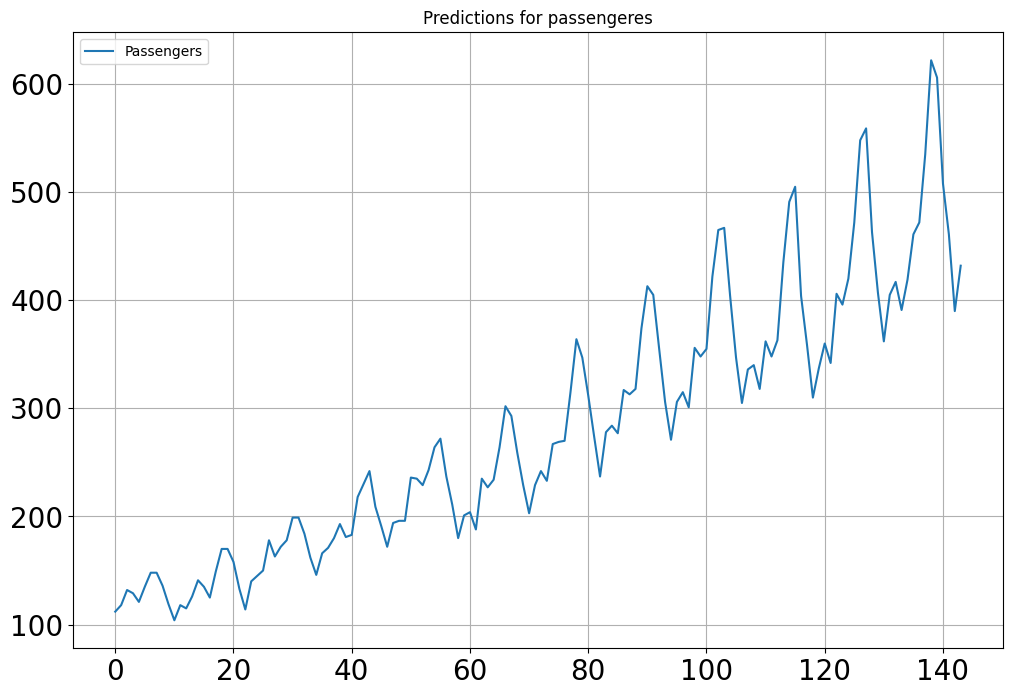

In [18]:
data[["month", "#Passengers"]]
data["#Passengers"].plot(figsize=(12, 8), title="Predictions for passengeres", fontsize=20, label="Passengers")
plt.legend()
plt.grid()
plt.show()

In [19]:
model = AutoTS(forecast_length=12, frequency='infer', 
               ensemble='simple')
model = model.fit(data, date_col='month', value_col='#Passengers', id_col=None)

Inferred frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
5/5 [==============================] - 11s 8ms/step - loss: 0.3802
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3766
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3783
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3802
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.3776
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.3776
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3781
Epoch 8/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3761
Epoch 9/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3735
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3776
Epoch 11/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3775
Epoch 12/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3774


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/1x3oivss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/5rip8xl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=171', 'data', 'file=/tmp/tmp2xi3y8fj/1x3oivss.json', 'init=/tmp/tmp2xi3y8fj/5rip8xl4.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelbdg2yx7s/prophet_model-20230410130334.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:03:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents in generation 0 of 10
Model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/i338usw_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/fl9puenm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14803', 'data', 'file=/tmp/tmp2xi3y8fj/i338usw_.json', 'init=/tmp/tmp2xi3y8fj/fl9puenm.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelbcjhyfgt/prophet_model-20230410130336.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:03:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 55 with model FBProphet in generation 0 of 10


13:03:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 56 with model SeasonalNaive in generation 0 of 10
Model Number: 57 with model DatepartRegression in generation 0 of 10
Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError('Input X contains NaN.\nDecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in mo

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 69 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/i7rjvtu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/wvn91xw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88196', 'data', 'file=/tmp/tmp2xi3y8fj/i7rjvtu7.json', 'init=/tmp/tmp2xi3y8fj/wvn91xw_.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelcbjnrll2/prophet_model-20230410130338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Model Number: 72 with model VAR in generation 0 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 73 in generation 0: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Model Number: 75 with model WindowRegression in generation 0 of 10
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 76 in generation 0: DatepartRegression
Mo

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 98 with model ARDL in generation 0 of 10
Model Number: 99 with model UnivariateMotif in generation 0 of 10
Model Number: 100 with model ARDL in generation 0 of 10
Model Number: 101 with model ETS in generation 0 of 10
Model Number: 102 with model UnivariateMotif in generation 0 of 10
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model SeasonalNaive in generation 0 of 10
Model Number: 105 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 105 in generation 0: UnobservedComponents
Model Number: 106 with model ConstantNaive in generation 0 of 10
Model Number: 107 with model LastValueNaive in generation 0 of 10
Model Number: 108 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 108 in generation 0: VAR
Model Number: 109 with model UnobservedComponents in generation 0 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 140 with model ARDL in generation 0 of 10
Model Number: 141 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 141 in generation 0: ARCH
Model Number: 142 with model MetricMotif in generation 0 of 10
Model Number: 143 with model NVAR in generation 0 of 10
Model Number: 144 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 144 in generation 0: ARCH
Model Number: 145 with model MetricMotif in generation 0 of 10
Model Number: 146 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 146 in generation 0: ARCH
Model Number: 147 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 147 in generation 0: VAR
Model Number: 148 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS 

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.24806e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model Theta in generation 0 of 10
Model Number: 164 with model AverageValueNaive in generation 0 of 10
Model Number: 165 with model Theta in generation 0 of 10
Model Number: 166 with model ETS in generation 0 of 10
Model Number: 167 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 167 in generation 0: GLM
Model Number: 168 with model MultivariateMotif in generation 0 of 10
Model Number: 169 with model ConstantNaive in generation 0 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 169 in generation 0: ConstantNaive
Model Number: 170 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 170 in generation 0: ARCH
Model Number: 171 with model FBProphet in generation 0 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_se

Model Number: 172 with model AverageValueNaive in generation 0 of 10
Model Number: 173 with model MultivariateMotif in generation 0 of 10
Model Number: 174 with model Theta in generation 0 of 10
Model Number: 175 with model GLM in generation 0 of 10
Model Number: 176 with model UnivariateMotif in generation 0 of 10
Model Number: 177 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 177 in generation 0: ARDL
Model Number: 178 with model MultivariateMotif in generation 0 of 10
Model Number: 179 with model NVAR in generation 0 of 10
Model Number: 180 with model UnivariateMotif in generation 0 of 10
Model Number: 181 with model Theta in generation 0 of 10
Model Number: 182 with model SectionalMotif in generation 0 of 10
Model Number: 183 with model ARIMA in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 183 in generation 0: ARIMA
Model Number: 184 with m

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 191 with model WindowRegression in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 191 in generation 1: WindowRegression
Model Number: 192 with model ConstantNaive in generation 1 of 10
Model Number: 193 with model SectionalMotif in generation 1 of 10
Model Number: 194 with model ARDL in generation 1 of 10
Model Number: 195 with model GLS in generation 1 of 10
Model Number: 196 with model SeasonalNaive in generation 1 of 10
Model Number: 197 with model LastValueNaive in generation 1 of 10
Model Number: 198 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 198 in generation 1: ARDL
Model Number: 199 with model Theta in generation 1 of 10
Model Number: 200 with model UnivariateMotif in generation 1 of 10
HolidayTransformer: no anomalies detected.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/r6hfpfu4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/uzc163zu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62578', 'data', 'file=/tmp/tmp2xi3y8fj/r6hfpfu4.json', 'init=/tmp/tmp2xi3y8fj/uzc163zu.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelik7knnnk/prophet_model-20230410130359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 201 with model FBProphet in generation 1 of 10


13:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 202 with model ETS in generation 1 of 10
Model Number: 203 with model WindowRegression in generation 1 of 10
Model Number: 204 with model ARDL in generation 1 of 10
Model Number: 205 with model LastValueNaive in generation 1 of 10
Model Number: 206 with model DatepartRegression in generation 1 of 10
Model Number: 207 with model Theta in generation 1 of 10
Model Number: 208 with model MultivariateMotif in generation 1 of 10
Model Number: 209 with model NVAR in generation 1 of 10
Model Number: 210 with model GLM in generation 1 of 10
Model Number: 211 with model MultivariateMotif in generation 1 of 10
Model Number: 212 with model MetricMotif in generation 1 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/ca3jm36x.json


Model Number: 213 with model FBProphet in generation 1 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/85bwni7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84794', 'data', 'file=/tmp/tmp2xi3y8fj/ca3jm36x.json', 'init=/tmp/tmp2xi3y8fj/85bwni7r.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelf8k8r9je/prophet_model-20230410130400.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 214 with model GLM in generation 1 of 10
Model Number: 215 with model UnivariateMotif in generation 1 of 10
Model Number: 216 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 216 in generation 1: ARIMA
Model Number: 217 with model UnivariateMotif in generation 1 of 10
Model Number: 218 with model SeasonalNaive in generation 1 of 10
Model Number: 219 with model UnobservedComponents in generation 1 of 10
Model Number: 220 with model DatepartRegression in generation 1 of 10
Model Number: 221 with model LastValueNaive in generation 1 of 10
Model Number: 222 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 222 in generation 1: FBProphet
Model Number: 223 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 223 i

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 229 with model LastValueNaive in generation 1 of 10
Model Number: 230 with model Theta in generation 1 of 10
Model Number: 231 with model ARDL in generation 1 of 10
Model Number: 232 with model DatepartRegression in generation 1 of 10
Model Number: 233 with model GLS in generation 1 of 10
Model Number: 234 with model DatepartRegression in generation 1 of 10
Model Number: 235 with model MetricMotif in generation 1 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/tgfb0te3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/61pty1kf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2373', 'data', 'file=/tmp/tmp2xi3y8fj/tgfb0te3.json', 'init=/tmp/tmp2xi3y8fj/61pty1kf.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model9nblsyv2/prophet_model-20230410130402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:02 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 236 with model FBProphet in generation 1 of 10


INFO:cmdstanpy:Chain [1] done processing


Model Number: 237 with model DatepartRegression in generation 1 of 10
Model Number: 238 with model LastValueNaive in generation 1 of 10
Model Number: 239 with model ARIMA in generation 1 of 10
Model Number: 240 with model DatepartRegression in generation 1 of 10
Model Number: 241 with model MultivariateMotif in generation 1 of 10
Model Number: 242 with model MetricMotif in generation 1 of 10
Model Number: 243 with model MultivariateMotif in generation 1 of 10
Model Number: 244 with model MultivariateMotif in generation 1 of 10
Model Number: 245 with model Theta in generation 1 of 10
Model Number: 246 with model UnivariateMotif in generation 1 of 10
Model Number: 247 with model Theta in generation 1 of 10
Model Number: 248 with model Theta in generation 1 of 10
Model Number: 249 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 249 in generation 1: MultivariateRegression
Model Num

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 260 with model ETS in generation 1 of 10
Model Number: 261 with model Theta in generation 1 of 10
Model Number: 262 with model ConstantNaive in generation 1 of 10
Model Number: 263 with model Theta in generation 1 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 264 with model ARIMA in generation 1 of 10
Model Number: 265 with model AverageValueNaive in generation 1 of 10
Model Number: 266 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 266 in generation 1: ARDL
Model Number: 267 with model UnivariateMotif in generation 1 of 10
HolidayTransformer: no anomalies detected.
Model Number: 268 with model Theta in generation 1 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 269 with model LastValueNaive in generation 1 of 10
Model Number: 270 with model UnivariateMotif in generation 1 of 10
Model Number: 271 with model DatepartRegression in generation 1 of 10
Epoch 1/50
2/2 [==============================] - 6s 19ms/step - loss: 0.0710
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0445
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0336
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0357
Epoch 5/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0372
Epoch 6/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0345
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0330
Epoch 8/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0321
Epoch 9/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0329
Epoch 10/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0333
Epoch 11/50
2/2 

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value e

Model Number: 319 with model MultivariateMotif in generation 2 of 10
Model Number: 320 with model Theta in generation 2 of 10
Model Number: 321 with model ARIMA in generation 2 of 10
Model Number: 322 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 322 in generation 2: UnobservedComponents
Model Number: 323 with model ETS in generation 2 of 10
Model Number: 324 with model NVAR in generation 2 of 10
Model Number: 325 with model SectionalMotif in generation 2 of 10
Template Eval Error: Exception('Transformer LocalLinearTrend failed on fit') in model 325 in generation 2: SectionalMotif
Model Number: 326 with model UnivariateMotif in generation 2 of 10
Model Number: 327 with model NVAR in generation 2 of 10
Model Number: 328 with model GLM in generation 2 of 10
Model Number: 329 with model Theta in generation 2 of 10
Model Number: 330 with model MultivariateRegression in generation 2 o

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 331 with model FBProphet in generation 2 of 10
No anomalies detected.


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/swqeuqho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/zo7mira6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81891', 'data', 'file=/tmp/tmp2xi3y8fj/swqeuqho.json', 'init=/tmp/tmp2xi3y8fj/zo7mira6.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelz7fy7056/prophet_model-20230410130454.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 332 with model UnivariateMotif in generation 2 of 10
Model Number: 333 with model MetricMotif in generation 2 of 10
Model Number: 334 with model LastValueNaive in generation 2 of 10
Model Number: 335 with model ConstantNaive in generation 2 of 10
Model Number: 336 with model ARIMA in generation 2 of 10
Model Number: 337 with model ConstantNaive in generation 2 of 10
Model Number: 338 with model ETS in generation 2 of 10
Model Number: 339 with model MultivariateRegression in generation 2 of 10
Model Number: 340 with model UnivariateMotif in generation 2 of 10
Model Number: 341 with model ARDL in generation 2 of 10
Model Number: 342 with model UnivariateMotif in generation 2 of 10
Model Number: 343 with model ConstantNaive in generation 2 of 10
Model Number: 344 with model AverageValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 344 in generation 2: AverageValueNaive
Model Number: 345 with model ARIMA in gene

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/el3dkhhe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/vpwac0oz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37724', 'data', 'file=/tmp/tmp2xi3y8fj/el3dkhhe.json', 'init=/tmp/tmp2xi3y8fj/vpwac0oz.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelgtm8a9g_/prophet_model-20230410130500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 373 with model ETS in generation 2 of 10
Model Number: 374 with model MetricMotif in generation 2 of 10
Model Number: 375 with model UnivariateMotif in generation 2 of 10
Model Number: 376 with model UnivariateMotif in generation 2 of 10
HolidayTransformer: no anomalies detected.
Model Number: 377 with model DatepartRegression in generation 2 of 10
Model Number: 378 with model MultivariateMotif in generation 2 of 10
Model Number: 379 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 380 with model AverageValueNaive in generation 2 of 10
Model Number: 381 with model LastValueNaive in generation 2 of 10
Model Number: 382 with model NVAR in generation 2 of 10
Model Number: 383 with model ARDL in generation 2 of 10
Model Number: 384 wit

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/3756257i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/ftf8nut1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94374', 'data', 'file=/tmp/tmp2xi3y8fj/3756257i.json', 'init=/tmp/tmp2xi3y8fj/ftf8nut1.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelfav4tk7k/prophet_model-20230410130514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:14 

Model Number: 402 with model FBProphet in generation 2 of 10


13:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 403 with model ARIMA in generation 2 of 10
Model Number: 404 with model Theta in generation 2 of 10
Model Number: 405 with model WindowRegression in generation 2 of 10
Model Number: 406 with model ConstantNaive in generation 2 of 10
Model Number: 407 with model ARIMA in generation 2 of 10
Model Number: 408 with model NVAR in generation 2 of 10
Model Number: 409 with model UnobservedComponents in generation 2 of 10
Model Number: 410 with model ARIMA in generation 2 of 10
Model Number: 411 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 411 in generation 2: DatepartRegression
Model Number: 412 with model MultivariateRegression in generation 2 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/xfzg6qv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/ff0m6l_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77336', 'data', 'file=/tmp/tmp2xi3y8fj/xfzg6qv0.json', 'init=/tmp/tmp2xi3y8fj/ff0m6l_v.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelf17e69qx/prophet_model-20230410130525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 413 with model FBProphet in generation 2 of 10
Model Number: 414 with model DatepartRegression in generation 2 of 10
Model Number: 415 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 415 in generation 2: ARIMA
Model Number: 416 with model DatepartRegression in generation 2 of 10
Model Number: 417 with model ETS in generation 2 of 10
Model Number: 418 with model UnobservedComponents in generation 2 of 10
Model Number: 419 with model ConstantNaive in generation 2 of 10
Model Number: 420 with model WindowRegression in generation 2 of 10
Model Number: 421 with model DatepartRegression in generation 2 of 10
Model Number: 422 with model AverageValueNaive in generation 2 of 10
Model Number: 423 with model ARDL in generation 2 of 10
Model Number: 424 with model ETS in generation 2 of 10
Model Number: 425 with model LastValueNaive in generation 2 of 10
Model Number: 426 with model Theta in 

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 430 with model UnivariateMotif in generation 2 of 10
Model Number: 431 with model Theta in generation 2 of 10
Model Number: 432 with model MultivariateMotif in generation 2 of 10
Model Number: 433 with model AverageValueNaive in generation 2 of 10
Model Number: 434 with model LastValueNaive in generation 2 of 10
Model Number: 435 with model AverageValueNaive in generation 2 of 10
Model Number: 436 with model MetricMotif in generation 2 of 10
New Generation: 3 of 10
Model Number: 437 with model GLS in generation 3 of 10
Model Number: 438 with model NVAR in generation 3 of 10
Model Number: 439 with model MultivariateRegression in generation 3 of 10
Model Number: 440 with model DatepartRegression in generation 3 of 10
Model Number: 441 with model AverageValueNaive in generation 3 of 10
Model Number: 442 with model ARDL in generation 3 of 10
Model Number: 443 with model AverageValueNaive in generation 3 of 10
Model Number: 444 with model ETS in generation 3 of 10
Model Number

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:620: RuntimeWarning: divide by zero encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


Model Number: 453 with model LastValueNaive in generation 3 of 10
Model Number: 454 with model MultivariateRegression in generation 3 of 10
Model Number: 455 with model LastValueNaive in generation 3 of 10
Model Number: 456 with model DatepartRegression in generation 3 of 10
Model Number: 457 with model NVAR in generation 3 of 10
Model Number: 458 with model ETS in generation 3 of 10
Model Number: 459 with model ConstantNaive in generation 3 of 10
Model Number: 460 with model MultivariateRegression in generation 3 of 10
Model Number: 461 with model UnivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 461 in generation 3: UnivariateMotif
Model Number: 462 with model LastValueNaive in generation 3 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/awh7zd2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/sgwqtdbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75671', 'data', 'file=/tmp/tmp2xi3y8fj/awh7zd2_.json', 'init=/tmp/tmp2xi3y8fj/sgwqtdbd.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model2rfx9zre/prophet_model-20230410130603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 463 with model FBProphet in generation 3 of 10


13:06:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 464 with model NVAR in generation 3 of 10
Model Number: 465 with model DatepartRegression in generation 3 of 10
Model Number: 466 with model UnivariateMotif in generation 3 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 466 in generation 3: UnivariateMotif
Model Number: 467 with model ARDL in generation 3 of 10
Model Number: 468 with model ETS in generation 3 of 10
Model Number: 469 with model AverageValueNaive in generation 3 of 10
Model Number: 470 with model MetricMotif in generation 3 of 10
Model Number: 471 with model NVAR in generation 3 of 10
Model Number: 472 with model ETS in generation 3 of 10
Model Number: 473 with model LastValueNaive in generation 3 of 10
Model Number: 474 with model ARDL in generation 3 of 10
Model Number: 475 with model DatepartRegression in generation 3 of 10
Model Number: 476 with model ARDL in generation 3 of 10
Model Number: 477 with model Multivaria

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/tdd97nj5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/x3cmfhom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2609', 'data', 'file=/tmp/tmp2xi3y8fj/tdd97nj5.json', 'init=/tmp/tmp2xi3y8fj/x3cmfhom.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelh9msewdg/prophet_model-20230410130650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 499 with model FBProphet in generation 3 of 10


13:06:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 500 with model ARIMA in generation 3 of 10
Model Number: 501 with model UnivariateMotif in generation 3 of 10
HolidayTransformer: no anomalies detected.
Model Number: 502 with model UnivariateMotif in generation 3 of 10
Model Number: 503 with model LastValueNaive in generation 3 of 10
Model Number: 504 with model UnobservedComponents in generation 3 of 10
Model Number: 505 with model MultivariateMotif in generation 3 of 10
Model Number: 506 with model LastValueNaive in generation 3 of 10
Model Number: 507 with model ARIMA in generation 3 of 10
Model Number: 508 with model ETS in generation 3 of 10
Model Number: 509 with model ConstantNaive in generation 3 of 10
Model Number: 510 with model MultivariateMotif in generation 3 of 10
Model Number: 511 with model GLM in generation 3 of 10
Model Number: 512 with model WindowRegression in generation 3 of 10
Model Number: 513 with model SeasonalNaive in generation 3 of 10
Model Number: 514 with model GLM in generation 3 of 10
Mode

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 546 with model ETS in generation 3 of 10
Model Number: 547 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 547 in generation 3: DatepartRegression
Model Number: 548 with model UnobservedComponents in generation 3 of 10
Model Number: 549 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 549 in generation 3: UnobservedComponents
Model Number: 550 with model NVAR in generation 3 of 10
Model Number: 551 with model AverageValueNaive in generation 3 of 10
Model Number: 552 with model SectionalMotif in generation 3 of 10
Model Number: 553 with model ETS in generation 3 of 10
Model Number: 554 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 554 in generation 3: ARIMA
Model Number: 555 wi

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 565 with model NVAR in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 565 in generation 4: NVAR
Model Number: 566 with model SectionalMotif in generation 4 of 10
Model Number: 567 with model MultivariateRegression in generation 4 of 10
Model Number: 568 with model FBProphet in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 568 in generation 4: FBProphet
Model Number: 569 with model GLS in generation 4 of 10
Model Number: 570 with model Theta in generation 4 of 10
Model Number: 571 with model SeasonalNaive in generation 4 of 10
Model Number: 572 with model MultivariateMotif in generation 4 of 10
Model Number: 573 with model ARDL in generation 4 of 10
Model Number: 574 with model ARIMA in generation 4 of 10
Model Number: 575 with model ARIMA in generation 4 of 10
Model Number: 576 with model MetricMotif in generation 4 of 10
Model Number: 577 with model GLS in generation 4 of 1

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 591 with model ConstantNaive in generation 4 of 10
Model Number: 592 with model Theta in generation 4 of 10
Model Number: 593 with model UnobservedComponents in generation 4 of 10
Model Number: 594 with model DatepartRegression in generation 4 of 10
Model Number: 595 with model Theta in generation 4 of 10
Model Number: 596 with model UnobservedComponents in generation 4 of 10
Model Number: 597 with model MultivariateMotif in generation 4 of 10
Model Number: 598 with model Theta in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 599 with model DatepartRegression in generation 4 of 10
Model Number: 600 with model MetricMotif in generation 4 of 10
Model Number: 601 with model Theta in generation 4 of 10
Model Number: 602 with model AverageValueNaive in generation 4 of 10
Model Number: 603 with model ARDL in generation 4 of 10
Model Number: 604 with model Theta in generation 4 of 10
Model Number: 605 with model MultivariateRegression in generation 4 of 10
Model Number: 606 with model ARIMA in generation 4 of 10
Model Number: 607 with model Theta in generation 4 of 10
Model Number: 608 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 608 in generation 4: GLM
Model Number: 609 with model AverageValueNaive in generation 4 of 10
Model Number: 610 with model DatepartRegression in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 611 with model ETS in generation 4 of 10
Model Number: 612 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 612 in generation 4: ARIMA
Model Number: 613 with model ARIMA in generation 4 of 10
Model Number: 614 with model ARIMA in generation 4 of 10
Model Number: 615 with model ETS in generation 4 of 10
Model Number: 616 with model SeasonalNaive in generation 4 of 10
Model Number: 617 with model ConstantNaive in generation 4 of 10
Model Number: 618 with model SeasonalNaive in generation 4 of 10
Model Number: 619 with model UnivariateMotif in generation 4 of 10
Model Number: 620 with model ARDL in generation 4 of 10
Model Number: 621 with model MetricMotif in generation 4 of 10
Model Number: 622 with model MultivariateMotif in generation 4 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/prd9r01o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/icvh5_46.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11579', 'data', 'file=/tmp/tmp2xi3y8fj/prd9r01o.json', 'init=/tmp/tmp2xi3y8fj/icvh5_46.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelp7df8w0i/prophet_model-20230410130910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 623 with model FBProphet in generation 4 of 10


13:09:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 624 with model UnivariateMotif in generation 4 of 10
Model Number: 625 with model MultivariateMotif in generation 4 of 10
Model Number: 626 with model MultivariateMotif in generation 4 of 10
Model Number: 627 with model Theta in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 627 in generation 4: Theta
Model Number: 628 with model GLS in generation 4 of 10
Model Number: 629 with model GLS in generation 4 of 10
Model Number: 630 with model ARDL in generation 4 of 10
Model Number: 631 with model GLS in generation 4 of 10
Model Number: 632 with model GLM in generation 4 of 10
Model Number: 633 with model UnobservedComponents in generation 4 of 10
Model Number: 634 with model GLM in generation 4 of 10
Model Number: 635 with model MetricMotif in generation 4 of 10
Model Number: 636 with model UnivariateMotif in generation 4 of 10
Model Number: 637 with model ETS in generation 4 of 10
Model Number: 638 with model ARIMA in generation 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/pcrluird.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/c5b4h1o7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=894', 'data', 'file=/tmp/tmp2xi3y8fj/pcrluird.json', 'init=/tmp/tmp2xi3y8fj/c5b4h1o7.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model1u8vpii1/prophet_model-20230410130952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 642 with model FBProphet in generation 4 of 10


13:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 643 with model ConstantNaive in generation 4 of 10
Model Number: 644 with model MetricMotif in generation 4 of 10
Model Number: 645 with model ConstantNaive in generation 4 of 10
Model Number: 646 with model ConstantNaive in generation 4 of 10
Model Number: 647 with model ARDL in generation 4 of 10
Model Number: 648 with model UnobservedComponents in generation 4 of 10
Model Number: 649 with model ARDL in generation 4 of 10
Model Number: 650 with model UnobservedComponents in generation 4 of 10
Model Number: 651 with model ARIMA in generation 4 of 10
Model Number: 652 with model ARDL in generation 4 of 10
Model Number: 653 with model GLM in generation 4 of 10
Model Number: 654 with model Theta in generation 4 of 10
Model Number: 655 with model MultivariateMotif in generation 4 of 10
Model Number: 656 with model LastValueNaive in generation 4 of 10
Model Number: 657 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 658 with model MultivariateRegression in generation 4 of 10
Model Number: 659 with model DatepartRegression in generation 4 of 10
Model Number: 660 with model NVAR in generation 4 of 10
Model Number: 661 with model LastValueNaive in generation 4 of 10
Model Number: 662 with model ARDL in generation 4 of 10
Model Number: 663 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 663 in generation 4: MultivariateRegression
Model Number: 664 with model GLM in generation 4 of 10
Model Number: 665 with model UnobservedComponents in generation 4 of 10
Model Number: 666 with model UnivariateMotif in generation 4 of 10
Model Number: 667 with model SectionalMotif in generation 4 of 10
Model Number: 668 with model ARDL in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.24806e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 669 with model Theta in generation 4 of 10
Model Number: 670 with model MultivariateMotif in generation 4 of 10
Model Number: 671 with model UnivariateMotif in generation 4 of 10
Model Number: 672 with model Theta in generation 4 of 10
Model Number: 673 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 673 in generation 4: GLM
Model Number: 674 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 674 in generation 4: ARDL
Model Number: 675 with model MultivariateMotif in generation 4 of 10
Model Number: 676 with model LastValueNaive in generation 4 of 10
Model Number: 677 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 677 in generation 4: MultivariateMotif
Model Number: 678 with model UnivariateMotif in gener

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 680 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("ARDL series #Passengers failed with error ValueError('The number of regressors (177) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larer than the sample available for estimation (130).') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nmonth                                                                         \n1949-01-01        1        1  2432917.5      1.0      0.0      0.0      0.0   \n1949-02-01        0        1  2432948.5      0.0      1.0      0.0      0.0   \n1949-03-01        0        1  2432976.5      0.0      0.0      1.0      0.0   \n1949-04-01        0        2  2433007.5      0.0      0.0      0.0      1.0   \n1949-05-01        1        2  2433037.5      0.0      0.0      0.0      0.0   \n...             ...      ...        ...      ...      ...      ...      ...   \n1959-08-01        1       

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Number: 690 with model UnobservedComponents in generation 5 of 10
Model Number: 691 with model MultivariateRegression in generation 5 of 10
Model Number: 692 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 692 in generation 5: GLM
Model Number: 693 with model SectionalMotif in generation 5 of 10
Model Number: 694 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 694 in generation 5: DatepartRegression
Model Number: 695 with model ARDL in generation 5 of 10
Model Number: 696 with model MultivariateMotif in generation 5 of 10
Model Number: 697 with model LastValueNaive in generation 5 of 10
Model Number: 698 with model MetricMotif in generation 5 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 699 with model WindowRegression in generation 5 of 10
Epoch 1/50
4/4 [==============================] - 3s 45ms/step - loss: 114.8724
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 79.1763
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 68.3034
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 61.8403
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 55.8899
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 46.5869
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 43.2860
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 40.1018
Epoch 9/50
4/4 [==============================] - 0s 11ms/step - loss: 37.5141
Epoch 10/50
4/4 [==============================] - 0s 8ms/step - loss: 36.4625
Epoch 11/50
4/4 [==============================] - 0s 7ms/step - loss: 31.5565
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - los

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 719 with model GLS in generation 5 of 10
Model Number: 720 with model MultivariateRegression in generation 5 of 10
Model Number: 721 with model Theta in generation 5 of 10
Model Number: 722 with model MultivariateMotif in generation 5 of 10
Model Number: 723 with model UnivariateMotif in generation 5 of 10
Model Number: 724 with model ARIMA in generation 5 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/9octuuik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/1yfu9jsi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3376', 'data', 'file=/tmp/tmp2xi3y8fj/9octuuik.json', 'init=/tmp/tmp2xi3y8fj/1yfu9jsi.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelwtnmepyp/prophet_model-20230410131101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 725 with model FBProphet in generation 5 of 10
Model Number: 726 with model ARIMA in generation 5 of 10
Model Number: 727 with model ARIMA in generation 5 of 10
Model Number: 728 with model LastValueNaive in generation 5 of 10
Model Number: 729 with model Theta in generation 5 of 10
Model Number: 730 with model ARDL in generation 5 of 10
Model Number: 731 with model ARDL in generation 5 of 10
Model Number: 732 with model LastValueNaive in generation 5 of 10
Model Number: 733 with model ARDL in generation 5 of 10
Model Number: 734 with model AverageValueNaive in generation 5 of 10
Model Number: 735 with model UnobservedComponents in generation 5 of 10
Model Number: 736 with model Theta in generation 5 of 10
Model Number: 737 with model MultivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 737 in generation 5: MultivariateMotif
Model Number: 738 with model GLM in generation 5 of 10
Model Number: 739 with model Sect

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 757 with model ARDL in generation 5 of 10
Model Number: 758 with model SeasonalNaive in generation 5 of 10
Model Number: 759 with model DatepartRegression in generation 5 of 10
Model Number: 760 with model MetricMotif in generation 5 of 10
Model Number: 761 with model ETS in generation 5 of 10
Model Number: 762 with model MultivariateRegression in generation 5 of 10
Model Number: 763 with model AverageValueNaive in generation 5 of 10
Model Number: 764 with model GLM in generation 5 of 10
Model Number: 765 with model GLM in generation 5 of 10
Model Number: 766 with model MetricMotif in generation 5 of 10
Model Number: 767 with model AverageValueNaive in generation 5 of 10
Model Number: 768 with model ARDL in generation 5 of 10
Model Number: 769 with model ARIMA in generation 5 of 10
Model Number: 770 with model MultivariateMotif in generation 5 of 10
Model Number: 771 with model ARIMA in generation 5 of 10
Model Number: 772 with model ConstantNaive in generation 5 of 10
Mo

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 786 with model Theta in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model Theta in generation 6 of 10
Model Number: 788 with model UnivariateMotif in generation 6 of 10
Model Number: 789 with model LastValueNaive in generation 6 of 10
Model Number: 790 with model ARDL in generation 6 of 10
Model Number: 791 with model GLS in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 791 in generation 6: GLS
Model Number: 792 with model ARIMA in generation 6 of 10
Model Number: 793 with model UnivariateMotif in generation 6 of 10
Model Number: 794 with model GLM in generation 6 of 10
Model Number: 795 with model AverageValueNaive in generation 6 of 10
Model Number: 796 with model AverageValueNaive in generation 6 of 10
Model Number: 797 with model UnivariateMotif in generation 6 of 10
Model Number: 798 with model UnivariateMotif in generation 6 of 10
Model Number: 799 with model WindowRegression in generation 6 of 

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 820 with model LastValueNaive in generation 6 of 10
Model Number: 821 with model UnobservedComponents in generation 6 of 10
Model Number: 822 with model ARDL in generation 6 of 10
Model Number: 823 with model MultivariateMotif in generation 6 of 10
Model Number: 824 with model DatepartRegression in generation 6 of 10
Model Number: 825 with model UnivariateMotif in generation 6 of 10
Model Number: 826 with model UnivariateMotif in generation 6 of 10
Model Number: 827 with model UnivariateMotif in generation 6 of 10
Model Number: 828 with model MultivariateMotif in generation 6 of 10
Model Number: 829 with model NVAR in generation 6 of 10
Model Number: 830 with model MultivariateMotif in generation 6 of 10
Model Number: 831 with model ARDL in generation 6 of 10
Model Number: 832 with model GLM in generation 6 of 10
Model Number: 833 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 833 in generation 6: Met

/usr/local/lib/python3.9/dist-packages/autots/tools/thresholding.py:321: RuntimeWarning: invalid value encountered in double_scalars
  if (E_seq_max_sorted[i] - E_seq_max_sorted[i + 1]) / E_seq_max_sorted[
/usr/local/lib/python3.9/dist-packages/autots/tools/thresholding.py:321: RuntimeWarning: divide by zero encountered in double_scalars
  if (E_seq_max_sorted[i] - E_seq_max_sorted[i + 1]) / E_seq_max_sorted[


Model Number: 849 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 849 in generation 6: GLM
Model Number: 850 with model ARDL in generation 6 of 10
Model Number: 851 with model NVAR in generation 6 of 10
Model Number: 852 with model MultivariateMotif in generation 6 of 10
Model Number: 853 with model GLM in generation 6 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 854 with model LastValueNaive in generation 6 of 10
Model Number: 855 with model ARIMA in generation 6 of 10
Model Number: 856 with model DatepartRegression in generation 6 of 10
Model Number: 857 with model NVAR in generation 6 of 10
Model Number: 858 with model ConstantNaive in generation 6 of 10
Model Number: 859 with model UnivariateMotif in generation 6 of 10
Model Number: 860 with model ARIMA in generation 6 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 861 with model ARDL in generation 6 of 10
Model Number: 862 with model DatepartRegression in generation 6 of 10
Model Number: 863 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 863 in generation 6: UnobservedComponents
Model Number: 864 with model Theta in generation 6 of 10
Model Number: 865 with model MultivariateRegression in generation 6 of 10
Model Number: 866 with model MetricMotif in generation 6 of 10
Model Number: 867 with model ARDL in generation 6 of 10
Model Number: 868 with model ETS in generation 6 of 10
Model Number: 869 with model ARIMA in generation 6 of 10
Model Number: 870 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 870 in generation 6: DatepartRegression
Model Number: 871 with model MultivariateMotif in generation 6 of 10
Model Number: 872 wit

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


New Generation: 7 of 10
Model Number: 887 with model MultivariateMotif in generation 7 of 10
Model Number: 888 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 888 in generation 7: GLM
Model Number: 889 with model ARDL in generation 7 of 10
Model Number: 890 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 891 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 892 with model GLS in generation 7 of 10
Model Number: 893 with model GLM in generation 7 of 10
Model Number: 894 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 894 in generation 7: DatepartRegression
Model Number: 895 with model MultivariateMotif in generation 7 of 10
Model Number: 896 with model MultivariateMotif in generation 7 of 10
Model Number: 897 with model Theta in generation 7 of 10
Model Number: 898 with model GLM in generation 7 of 10
Model Number: 899 with model ARIMA in generation 7 of 10
Model Number: 900 with model GLM in generation 7 of 10
Model Number: 901 with model LastValueNaive in generation 7 of 10
Model Number: 902 with model Theta in generation 7 of 10
Model Number: 903 with model UnivariateMotif in generation 7 of 10
Model Number: 904 with model MultivariateMotif in generation 7 of 10
Model Number: 905 with model AverageValueNaive in generation 

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 996 with model MultivariateMotif in generation 8 of 10
Model Number: 997 with model GLM in generation 8 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 998 with model ARIMA in generation 8 of 10
Model Number: 999 with model SeasonalNaive in generation 8 of 10
Model Number: 1000 with model GLM in generation 8 of 10
Model Number: 1001 with model MetricMotif in generation 8 of 10
Model Number: 1002 with model MetricMotif in generation 8 of 10
Model Number: 1003 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1003 in generation 8: AverageValueNaive
Model Number: 1004 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1004 in generation 8: DatepartRegression
Model Number: 1005 with model DatepartRegression in generation 8 of 10
Model Number: 1006 with model Theta in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1006 in generation 8: Theta
Model Number: 1007 with model MetricMotif in generation 8 of

1/1 [==============================] - 0s 165ms/step
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1009 in generation 8: DatepartRegression
Model Number: 1010 with model AverageValueNaive in generation 8 of 10
Model Number: 1011 with model MetricMotif in generation 8 of 10
Model Number: 1012 with model ARIMA in generation 8 of 10
Model Number: 1013 with model Theta in generation 8 of 10
Model Number: 1014 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1014 in generation 8: DatepartRegression
Model Number: 1015 with model MultivariateMotif in generation 8 of 10
Model Number: 1016 with model GLM in generation 8 of 10
Model Number: 1017 with model ARDL in generation 8 of 10
Model Number: 1018 with model UnivariateMotif in generation 8 of 10
Model Number: 1019 with model GLM in generation 8 of 10
Templat

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/vbs_3w90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/qaj7pag7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16803', 'data', 'file=/tmp/tmp2xi3y8fj/vbs_3w90.json', 'init=/tmp/tmp2xi3y8fj/qaj7pag7.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model9h4lz1ae/prophet_model-20230410131501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1062 with model FBProphet in generation 8 of 10


13:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1063 with model MultivariateRegression in generation 8 of 10
Model Number: 1064 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("ARDL series #Passengers failed with error ValueError('The number of regressors (553) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larer than the sample available for estimation (130).') exog train             dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nmonth                                                               ...   \n1949-01-01  1.0  1.0  2432917.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n1949-02-01  1.0  0.0  2432948.5  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   \n1949-03-01  1.0  0.0  2432976.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n1949-04-01  1.0  0.0  2433007.5  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   \n1949-05-01  1.0  1.0  2433037.5  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   \n...         ...  ...        ...  ...  ...  ...  ...  ...  

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/3svps2ct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/o9epgpd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46735', 'data', 'file=/tmp/tmp2xi3y8fj/3svps2ct.json', 'init=/tmp/tmp2xi3y8fj/o9epgpd2.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelins4guy5/prophet_model-20230410131505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1088 with model FBProphet in generation 9 of 10


13:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1089 with model UnivariateMotif in generation 9 of 10
Model Number: 1090 with model Theta in generation 9 of 10
Model Number: 1091 with model ConstantNaive in generation 9 of 10
Model Number: 1092 with model DatepartRegression in generation 9 of 10
Model Number: 1093 with model MultivariateRegression in generation 9 of 10
Model Number: 1094 with model ETS in generation 9 of 10
Model Number: 1095 with model MetricMotif in generation 9 of 10
Model Number: 1096 with model ETS in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1096 in generation 9: ETS
Model Number: 1097 with model UnivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1097 in generation 9: UnivariateMotif
Model Number: 1098 with model ARIMA in generation 9 of 10
Template Eval Error: Exception('Transformer LocalLinearTrend failed on fit') in model 1098 in generation 9: ARIMA
Model Number: 10

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.24806e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1105 with model WindowRegression in generation 9 of 10
Epoch 1/100
6/6 [==============================] - 11s 129ms/step - loss: 7582408.0000 - val_loss: 390978.8750
Epoch 2/100
6/6 [==============================] - 0s 28ms/step - loss: 6731328.0000 - val_loss: 300486.9688
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 6520430.5000 - val_loss: 244231.0781
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 6251781.5000 - val_loss: 240165.2969
Epoch 5/100
6/6 [==============================] - 0s 25ms/step - loss: 6144611.5000 - val_loss: 203859.3906
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 6100160.5000 - val_loss: 168507.4219
Epoch 7/100
6/6 [==============================] - 0s 27ms/step - loss: 5973288.0000 - val_loss: 137429.7500
Epoch 8/100
6/6 [==============================] - 0s 28ms/step - loss: 5717478.0000 - val_loss: 125407.8438
Epoch 9/100
6/6 [==============================] - 0s 29m

1/1 [==============================] - 0s 22ms/step
Model Number: 1106 with model UnivariateMotif in generation 9 of 10
Model Number: 1107 with model LastValueNaive in generation 9 of 10
Model Number: 1108 with model MetricMotif in generation 9 of 10
Model Number: 1109 with model MetricMotif in generation 9 of 10
Model Number: 1110 with model LastValueNaive in generation 9 of 10
Model Number: 1111 with model GLS in generation 9 of 10
Model Number: 1112 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1112 in generation 9: DatepartRegression
Model Number: 1113 with model MultivariateRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1123 with model NVAR in generation 9 of 10
Model Number: 1124 with model GLM in generation 9 of 10
Model Number: 1125 with model SeasonalNaive in generation 9 of 10
Model Number: 1126 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1126 in generation 9: DatepartRegression
Model Number: 1127 with model SectionalMotif in generation 9 of 10
Model Number: 1128 with model ARDL in generation 9 of 10
Model Number: 1129 with model ARDL in generation 9 of 10
Model Number: 1130 with model UnobservedComponents in generation 9 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 1130 in generation 9: UnobservedComponents
Model Number: 1131 with model UnivariateMotif in generation 9 of 10
Model Number: 1132 with model ConstantNaive in generation 9 of 10
Model Number: 1133 with model UnobservedComponents in generation 9 of 10
Model Number: 1134 with model SectionalMotif i

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1139 with model MultivariateMotif in generation 9 of 10
Model Number: 1140 with model ConstantNaive in generation 9 of 10
Model Number: 1141 with model SectionalMotif in generation 9 of 10
Model Number: 1142 with model Theta in generation 9 of 10
Model Number: 1143 with model Theta in generation 9 of 10
Model Number: 1144 with model WindowRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model Number: 1145 with model AverageValueNaive in generation 9 of 10
Ho

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.24806e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1151 with model UnivariateMotif in generation 9 of 10
Model Number: 1152 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1152 in generation 9: DatepartRegression
Model Number: 1153 with model LastValueNaive in generation 9 of 10
Model Number: 1154 with model UnivariateMotif in generation 9 of 10
Model Number: 1155 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1155 in generation 9: DatepartRegression
Model Number: 1156 with model ARDL in generation 9 of 10
Model Number: 1157 with model MetricMotif in generation 9 of 10
Model Number: 1158 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1158 in generation 9: ARIMA
Model Number: 1159 with model ARDL in generation 9 of 10
Model Number: 1160 with mod

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1162 with model MetricMotif in generation 9 of 10
Model Number: 1163 with model ETS in generation 9 of 10
Model Number: 1164 with model ARDL in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1164 in generation 9: ARDL
Model Number: 1165 with model MultivariateMotif in generation 9 of 10
Model Number: 1166 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1166 in generation 9: WindowRegression
Model Number: 1167 with model ConstantNaive in generation 9 of 10
Model Number: 1168 with model SectionalMotif in generation 9 of 10
Model Number: 1169 with model MultivariateMotif in generation 9 of 10
Model Number: 1170 with model Theta in generation 9 of 10
Model Number: 1171 with model ARIMA in generation 9 of 10
Model Number: 1172 with model UnivariateMotif in generation 9 of 10
Model Number: 1173 with model Theta in generation 

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1187 with model DatepartRegression in generation 10 of 10
Model Number: 1188 with model SectionalMotif in generation 10 of 10
Model Number: 1189 with model WindowRegression in generation 10 of 10
Model Number: 1190 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1190 in generation 10: Theta
Model Number: 1191 with model MultivariateRegression in generation 10 of 10
Model Number: 1192 with model LastValueNaive in generation 10 of 10
Model Number: 1193 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1193 in generation 10: ARDL
Model Number: 1194 with model ARIMA in generation 10 of 10
Model Number: 1195 with model SectionalMotif in generation 10 of 10
Model Number: 1196 with model SectionalMotif in generation 10 of 10
Model Number: 1197 with model UnivariateMotif in generation 10 of 10
Model Number: 1198 with 

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1237 with model MetricMotif in generation 10 of 10
Model Number: 1238 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1238 in generation 10: DatepartRegression
Model Number: 1239 with model GLM in generation 10 of 10
Model Number: 1240 with model UnivariateMotif in generation 10 of 10
Model Number: 1241 with model UnivariateMotif in generation 10 of 10
Model Number: 1242 with model Theta in generation 10 of 10
Model Number: 1243 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("ARDL series #Passengers failed with error ValueError('The number of regressors (828) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larer than the sample available for estimation (130).') exog train             dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nmonth                                                    

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1251 with model MetricMotif in generation 10 of 10
Model Number: 1252 with model Theta in generation 10 of 10
Model Number: 1253 with model LastValueNaive in generation 10 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1254 with model ARDL in generation 10 of 10
Model Number: 1255 with model GLM in generation 10 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1255 in generation 10: GLM
Model Number: 1256 with model MultivariateMotif in generation 10 of 10
Model Number: 1257 with model MultivariateMotif in generation 10 of 10
Model Number: 1258 with model UnivariateMotif in generation 10 of 10
Model Number: 1259 with model Theta in generation 10 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 1260 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("ARDL series #Passengers failed with error ValueError('The number of regressors (67) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larer than the sample available for estimation (64).') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nmonth                                                                         \n1954-07-01        0        3  2434924.5      0.0      0.0      0.0      0.0   \n1954-08-01        1        3  2434955.5      0.0      0.0      0.0      0.0   \n1954-09-01        0        3  2434986.5      0.0      0.0      0.0      0.0   \n1954-10-01        0        4  2435016.5      0.0      0.0      0.0      0.0   \n1954-11-01        0        4  2435047.5      0.0      0.0      0.0      0.0   \n...             ...      ...        ...      ...      ...      ...      ...   \n1959-08-01        1       

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 1262 with model Ensemble in generation 11 of Ensembles
Model Number: 1263 with model Ensemble in generation 11 of Ensembles
Model Number: 1264 with model Ensemble in generation 11 of Ensembles
Model Number: 1265 with model Ensemble in generation 11 of Ensembles
Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in generation 11 of Ensembles
Model Number: 1268 with model Ensemble in generation 11 of Ensembles
Model Number: 1269 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 188 with model ARIMA for Validation 1
📈 1 - ARIMA with avg smape 8.22: 
Model Number: 2 of 188 with model Ensemble for Validation 1
2 - Ensemble with avg smape 9.14: 
Model Number: 3 of 188 with model Ensemble for Validation 1
3 - Ensemble with avg smape 9.34: 
Model Number: 4 of 188 with model ARIMA for Validation 1
4 - ARIMA with avg smape 9.41: 
Model Number: 5 of 188 with model Ensemble for Validation 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


63 - GLM with avg smape 7.75: 
Model Number: 64 of 188 with model GLM for Validation 1
64 - GLM with avg smape 7.74: 
Model Number: 65 of 188 with model GLM for Validation 1
65 - GLM with avg smape 7.74: 
Model Number: 66 of 188 with model GLM for Validation 1
66 - GLM with avg smape 7.74: 
Model Number: 67 of 188 with model GLM for Validation 1
67 - GLM with avg smape 7.74: 
Model Number: 68 of 188 with model GLM for Validation 1
68 - GLM with avg smape 3.64: 
Model Number: 69 of 188 with model GLM for Validation 1
69 - GLM with avg smape 5.86: 
Model Number: 70 of 188 with model GLM for Validation 1
70 - GLM with avg smape 3.67: 
Model Number: 71 of 188 with model MultivariateRegression for Validation 1
71 - MultivariateRegression with avg smape 8.24: 
Model Number: 72 of 188 with model MetricMotif for Validation 1
72 - MetricMotif with avg smape 8.38: 
Model Number: 73 of 188 with model MetricMotif for Validation 1
73 - MetricMotif with avg smape 8.38: 
Model Number: 74 of 188 with 

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


74 - WindowRegression with avg smape 9.88: 
Model Number: 75 of 188 with model SectionalMotif for Validation 1
75 - SectionalMotif with avg smape 13.07: 
Model Number: 76 of 188 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


76 - MultivariateRegression with avg smape 11.63: 
Model Number: 77 of 188 with model DatepartRegression for Validation 1
77 - DatepartRegression with avg smape 4.57: 
Model Number: 78 of 188 with model MetricMotif for Validation 1
78 - MetricMotif with avg smape 8.28: 
Model Number: 79 of 188 with model MetricMotif for Validation 1
79 - MetricMotif with avg smape 8.28: 
Model Number: 80 of 188 with model WindowRegression for Validation 1
80 - WindowRegression with avg smape 10.61: 
Model Number: 81 of 188 with model DatepartRegression for Validation 1
81 - DatepartRegression with avg smape 4.92: 
Model Number: 82 of 188 with model DatepartRegression for Validation 1
82 - DatepartRegression with avg smape 9.53: 
Model Number: 83 of 188 with model DatepartRegression for Validation 1
83 - DatepartRegression with avg smape 9.52: 
Model Number: 84 of 188 with model MetricMotif for Validation 1
84 - MetricMotif with avg smape 10.39: 
Model Number: 85 of 188 with model DatepartRegression for

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


126 - WindowRegression with avg smape 10.38: 
Model Number: 127 of 188 with model UnobservedComponents for Validation 1
127 - UnobservedComponents with avg smape 13.05: 
Model Number: 128 of 188 with model UnobservedComponents for Validation 1
128 - UnobservedComponents with avg smape 13.05: 
Model Number: 129 of 188 with model SectionalMotif for Validation 1
129 - SectionalMotif with avg smape 11.76: 
Model Number: 130 of 188 with model SectionalMotif for Validation 1
130 - SectionalMotif with avg smape 11.76: 
Model Number: 131 of 188 with model ConstantNaive for Validation 1
131 - ConstantNaive with avg smape 11.76: 
Model Number: 132 of 188 with model ConstantNaive for Validation 1
132 - ConstantNaive with avg smape 11.76: 
Model Number: 133 of 188 with model UnobservedComponents for Validation 1
133 - UnobservedComponents with avg smape 11.39: 
Model Number: 134 of 188 with model ConstantNaive for Validation 1
134 - ConstantNaive with avg smape 11.79: 
Model Number: 135 of 188 wit

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


135 - UnobservedComponents with avg smape 15.91: 
Model Number: 136 of 188 with model UnobservedComponents for Validation 1
136 - UnobservedComponents with avg smape 15.92: 
Model Number: 137 of 188 with model UnobservedComponents for Validation 1
137 - UnobservedComponents with avg smape 11.67: 
Model Number: 138 of 188 with model SectionalMotif for Validation 1
138 - SectionalMotif with avg smape 11.49: 
Model Number: 139 of 188 with model AverageValueNaive for Validation 1
139 - AverageValueNaive with avg smape 11.45: 
Model Number: 140 of 188 with model AverageValueNaive for Validation 1
140 - AverageValueNaive with avg smape 11.4: 
Model Number: 141 of 188 with model AverageValueNaive for Validation 1
141 - AverageValueNaive with avg smape 10.66: 
Model Number: 142 of 188 with model GLS for Validation 1
142 - GLS with avg smape 11.44: 
Model Number: 143 of 188 with model GLS for Validation 1
143 - GLS with avg smape 11.44: 
Model Number: 144 of 188 with model GLS for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/2f0ua59a.json


152 - SeasonalNaive with avg smape 18.46: 
Model Number: 153 of 188 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/su0uep3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53524', 'data', 'file=/tmp/tmp2xi3y8fj/2f0ua59a.json', 'init=/tmp/tmp2xi3y8fj/su0uep3n.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model_8_2pz6o/prophet_model-20230410132833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


153 - FBProphet with avg smape 14.09: 
Model Number: 154 of 188 with model NVAR for Validation 1
154 - NVAR with avg smape 10.64: 
Model Number: 155 of 188 with model WindowRegression for Validation 1
155 - WindowRegression with avg smape 11.55: 
Model Number: 156 of 188 with model SeasonalNaive for Validation 1
156 - SeasonalNaive with avg smape 12.41: 
Model Number: 157 of 188 with model SeasonalNaive for Validation 1
157 - SeasonalNaive with avg smape 12.62: 
Model Number: 158 of 188 with model SeasonalNaive for Validation 1
158 - SeasonalNaive with avg smape 12.62: 
Model Number: 159 of 188 with model AverageValueNaive for Validation 1
159 - AverageValueNaive with avg smape 20.77: 
Model Number: 160 of 188 with model SeasonalNaive for Validation 1
160 - SeasonalNaive with avg smape 23.2: 
Model Number: 161 of 188 with model GLS for Validation 1
161 - GLS with avg smape 17.21: 
Model Number: 162 of 188 with model AverageValueNaive for Validation 1
162 - AverageValueNaive with avg sm

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/fwv0crus.json



Model Number: 175 of 188 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/2va6qbrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18981', 'data', 'file=/tmp/tmp2xi3y8fj/fwv0crus.json', 'init=/tmp/tmp2xi3y8fj/2va6qbrv.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modely_d45_9h/prophet_model-20230410132834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


175 - FBProphet with avg smape 15.61: 
Model Number: 176 of 188 with model NVAR for Validation 1
176 - NVAR with avg smape 13.51: 
Model Number: 177 of 188 with model NVAR for Validation 1
177 - NVAR with avg smape 11.8: 
Model Number: 178 of 188 with model NVAR for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/j0q048yo.json


178 - NVAR with avg smape 11.8: 
Model Number: 179 of 188 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/03nr9xh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3748', 'data', 'file=/tmp/tmp2xi3y8fj/j0q048yo.json', 'init=/tmp/tmp2xi3y8fj/03nr9xh4.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelukul_ja3/prophet_model-20230410132835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/t58uotlm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2x

179 - FBProphet with avg smape 15.07: 
Model Number: 180 of 188 with model FBProphet for Validation 1


13:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/2npxazz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/j7niaohd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55573', 'data', 'file=/tmp/tmp2xi3y8fj/2npxazz5.json', 'init=/tmp/tmp2xi3y8fj/j7niaohd.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelv0mpcdbb/prophet_model-20230410132836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


180 - FBProphet with avg smape 14.19: 
Model Number: 181 of 188 with model FBProphet for Validation 1


13:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


181 - FBProphet with avg smape 14.19: 
Model Number: 182 of 188 with model NVAR for Validation 1
182 - NVAR with avg smape 22.39: 
Model Number: 183 of 188 with model NVAR for Validation 1
183 - NVAR with avg smape 24.35: 
Model Number: 184 of 188 with model GLS for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/53_h4bof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/35bwg8ud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37940', 'data', 'file=/tmp/tmp2xi3y8fj/53_h4bof.json', 'init=/tmp/tmp2xi3y8fj/35bwg8ud.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model5xpeccav/prophet_model-20230410132836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


184 - GLS with avg smape 21.62: 
Model Number: 185 of 188 with model FBProphet for Validation 1


13:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/x5wcn7wu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/1lqrni9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61580', 'data', 'file=/tmp/tmp2xi3y8fj/x5wcn7wu.json', 'init=/tmp/tmp2xi3y8fj/1lqrni9m.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelwhxk46f2/prophet_model-20230410132837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


185 - FBProphet with avg smape 16.94: 
Model Number: 186 of 188 with model FBProphet for Validation 1


13:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/m9prl1xz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/nf6r9h4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87060', 'data', 'file=/tmp/tmp2xi3y8fj/m9prl1xz.json', 'init=/tmp/tmp2xi3y8fj/nf6r9h4u.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelkyd71ula/prophet_model-20230410132837.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


186 - FBProphet with avg smape 14.69: 
Model Number: 187 of 188 with model FBProphet for Validation 1
No anomalies detected.


13:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/k758t86u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/2l4citx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10468', 'data', 'file=/tmp/tmp2xi3y8fj/k758t86u.json', 'init=/tmp/tmp2xi3y8fj/2l4citx3.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelled7nvh5/prophet_model-20230410132837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:37 - cmdstanpy - INFO - Chain [1] d

187 - FBProphet with avg smape 21.54: 
Model Number: 188 of 188 with model FBProphet for Validation 1
188 - FBProphet with avg smape 17.79: 
Validation Round: 2
Model Number: 1 of 188 with model ARIMA for Validation 2
📈 1 - ARIMA with avg smape 6.0: 
Model Number: 2 of 188 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 5.1: 
Model Number: 3 of 188 with model Ensemble for Validation 2
3 - Ensemble with avg smape 5.93: 
Model Number: 4 of 188 with model ARIMA for Validation 2
4 - ARIMA with avg smape 6.25: 
Model Number: 5 of 188 with model Ensemble for Validation 2
5 - Ensemble with avg smape 5.53: 
Model Number: 6 of 188 with model ARIMA for Validation 2
6 - ARIMA with avg smape 5.53: 
Model Number: 7 of 188 with model ARIMA for Validation 2
7 - ARIMA with avg smape 5.53: 
Model Number: 8 of 188 with model ARIMA for Validation 2
8 - ARIMA with avg smape 5.51: 
Model Number: 9 of 188 with model ARIMA for Validation 2
9 - ARIMA with avg smape 5.47: 
Model Number: 10 o

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


62 - GLM with avg smape 4.58: 
Model Number: 63 of 188 with model GLM for Validation 2
63 - GLM with avg smape 4.81: 
Model Number: 64 of 188 with model GLM for Validation 2
64 - GLM with avg smape 4.8: 
Model Number: 65 of 188 with model GLM for Validation 2
65 - GLM with avg smape 4.8: 
Model Number: 66 of 188 with model GLM for Validation 2
66 - GLM with avg smape 4.8: 
Model Number: 67 of 188 with model GLM for Validation 2
67 - GLM with avg smape 4.8: 
Model Number: 68 of 188 with model GLM for Validation 2
📈 68 - GLM with avg smape 3.06: 
Model Number: 69 of 188 with model GLM for Validation 2
69 - GLM with avg smape 7.7: 
Model Number: 70 of 188 with model GLM for Validation 2
70 - GLM with avg smape 3.19: 
Model Number: 71 of 188 with model MultivariateRegression for Validation 2
71 - MultivariateRegression with avg smape 11.83: 
Model Number: 72 of 188 with model MetricMotif for Validation 2
72 - MetricMotif with avg smape 11.38: 
Model Number: 73 of 188 with model MetricMotif

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


74 - WindowRegression with avg smape 6.72: 
Model Number: 75 of 188 with model SectionalMotif for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


75 - SectionalMotif with avg smape 3.34: 
Model Number: 76 of 188 with model MultivariateRegression for Validation 2
76 - MultivariateRegression with avg smape 11.18: 
Model Number: 77 of 188 with model DatepartRegression for Validation 2
77 - DatepartRegression with avg smape 14.46: 
Model Number: 78 of 188 with model MetricMotif for Validation 2
78 - MetricMotif with avg smape 11.87: 
Model Number: 79 of 188 with model MetricMotif for Validation 2
79 - MetricMotif with avg smape 11.87: 
Model Number: 80 of 188 with model WindowRegression for Validation 2
80 - WindowRegression with avg smape 4.78: 
Model Number: 81 of 188 with model DatepartRegression for Validation 2
81 - DatepartRegression with avg smape 16.28: 
Model Number: 82 of 188 with model DatepartRegression for Validation 2
82 - DatepartRegression with avg smape 9.2: 
Model Number: 83 of 188 with model DatepartRegression for Validation 2
83 - DatepartRegression with avg smape 9.22: 
Model Number: 84 of 188 with model MetricM

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


126 - WindowRegression with avg smape 4.08: 
Model Number: 127 of 188 with model UnobservedComponents for Validation 2
127 - UnobservedComponents with avg smape 17.02: 
Model Number: 128 of 188 with model UnobservedComponents for Validation 2
128 - UnobservedComponents with avg smape 32.12: 
Model Number: 129 of 188 with model SectionalMotif for Validation 2
129 - SectionalMotif with avg smape 3.22: 
Model Number: 130 of 188 with model SectionalMotif for Validation 2
130 - SectionalMotif with avg smape 3.22: 
Model Number: 131 of 188 with model ConstantNaive for Validation 2
131 - ConstantNaive with avg smape 3.22: 
Model Number: 132 of 188 with model ConstantNaive for Validation 2
132 - ConstantNaive with avg smape 3.22: 
Model Number: 133 of 188 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.9/dist-packages/autots/tools/thresholding.py:321: RuntimeWarning: invalid value encountered in double_scalars
  if (E_seq_max_sorted[i] - E_seq_max_sorted[i + 1]) / E_seq_max_sorted[
/usr/local/lib/python3.9/dist-packages/autots/tools/thresholding.py:321: RuntimeWarning: divide by zero encountered in double_scalars
  if (E_seq_max_sorted[i] - E_seq_max_sorted[i + 1]) / E_seq_max_sorted[


133 - UnobservedComponents with avg smape 11.66: 
Model Number: 134 of 188 with model ConstantNaive for Validation 2
134 - ConstantNaive with avg smape 3.25: 
Model Number: 135 of 188 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


135 - UnobservedComponents with avg smape 12.51: 
Model Number: 136 of 188 with model UnobservedComponents for Validation 2
136 - UnobservedComponents with avg smape 12.52: 
Model Number: 137 of 188 with model UnobservedComponents for Validation 2
137 - UnobservedComponents with avg smape 11.53: 
Model Number: 138 of 188 with model SectionalMotif for Validation 2
138 - SectionalMotif with avg smape 16.02: 
Model Number: 139 of 188 with model AverageValueNaive for Validation 2
139 - AverageValueNaive with avg smape 15.88: 
Model Number: 140 of 188 with model AverageValueNaive for Validation 2
140 - AverageValueNaive with avg smape 15.29: 
Model Number: 141 of 188 with model AverageValueNaive for Validation 2
141 - AverageValueNaive with avg smape 12.49: 
Model Number: 142 of 188 with model GLS for Validation 2
142 - GLS with avg smape 12.63: 
Model Number: 143 of 188 with model GLS for Validation 2
143 - GLS with avg smape 12.59: 
Model Number: 144 of 188 with model GLS for Validation 2

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


152 - SeasonalNaive with avg smape 11.17: 
Model Number: 153 of 188 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/lymhlfki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/gfxq4ehm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37236', 'data', 'file=/tmp/tmp2xi3y8fj/lymhlfki.json', 'init=/tmp/tmp2xi3y8fj/gfxq4ehm.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modela9ps54vt/prophet_model-20230410133513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:35:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


153 - FBProphet with avg smape 14.4: 
Model Number: 154 of 188 with model NVAR for Validation 2
154 - NVAR with avg smape 11.73: 
Model Number: 155 of 188 with model WindowRegression for Validation 2
155 - WindowRegression with avg smape 49.03: 
Model Number: 156 of 188 with model SeasonalNaive for Validation 2
156 - SeasonalNaive with avg smape 10.9: 
Model Number: 157 of 188 with model SeasonalNaive for Validation 2
157 - SeasonalNaive with avg smape 10.69: 
Model Number: 158 of 188 with model SeasonalNaive for Validation 2
158 - SeasonalNaive with avg smape 10.69: 
Model Number: 159 of 188 with model AverageValueNaive for Validation 2
159 - AverageValueNaive with avg smape 12.02: 
Model Number: 160 of 188 with model SeasonalNaive for Validation 2
160 - SeasonalNaive with avg smape 8.01: 
Model Number: 161 of 188 with model GLS for Validation 2
161 - GLS with avg smape 6.81: 
Model Number: 162 of 188 with model AverageValueNaive for Validation 2
162 - AverageValueNaive with avg smape

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/rawppzhm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/pachoebn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61182', 'data', 'file=/tmp/tmp2xi3y8fj/rawppzhm.json', 'init=/tmp/tmp2xi3y8fj/pachoebn.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model45eoh7f9/prophet_model-20230410133514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:35:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


175 - FBProphet with avg smape 14.29: 
Model Number: 176 of 188 with model NVAR for Validation 2
176 - NVAR with avg smape 17.86: 
Model Number: 177 of 188 with model NVAR for Validation 2
177 - NVAR with avg smape 11.28: 
Model Number: 178 of 188 with model NVAR for Validation 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/msu986yx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/5rula6s0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84670', 'data', 'file=/tmp/tmp2xi3y8fj/msu986yx.json', 'init=/tmp/tmp2xi3y8fj/5rula6s0.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model6ovpzcdq/prophet_model-20230410133514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


178 - NVAR with avg smape 11.28: 
Model Number: 179 of 188 with model FBProphet for Validation 2


13:35:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/stoz06x2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/0va7ppxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98518', 'data', 'file=/tmp/tmp2xi3y8fj/stoz06x2.json', 'init=/tmp/tmp2xi3y8fj/0va7ppxq.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model8nfvu2jv/prophet_model-20230410133515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


179 - FBProphet with avg smape 14.33: 
Model Number: 180 of 188 with model FBProphet for Validation 2


13:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/a0079plt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/szsovjng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35935', 'data', 'file=/tmp/tmp2xi3y8fj/a0079plt.json', 'init=/tmp/tmp2xi3y8fj/szsovjng.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelf_e7xx70/prophet_model-20230410133516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


180 - FBProphet with avg smape 10.01: 
Model Number: 181 of 188 with model FBProphet for Validation 2


13:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


181 - FBProphet with avg smape 10.01: 
Model Number: 182 of 188 with model NVAR for Validation 2
182 - NVAR with avg smape 12.35: 
Model Number: 183 of 188 with model NVAR for Validation 2
183 - NVAR with avg smape 34.06: 
Model Number: 184 of 188 with model GLS for Validation 2
184 - GLS with avg smape 13.49: 


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/66nxucbt.json


Model Number: 185 of 188 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/5eza3obd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63141', 'data', 'file=/tmp/tmp2xi3y8fj/66nxucbt.json', 'init=/tmp/tmp2xi3y8fj/5eza3obd.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelouqmnw94/prophet_model-20230410133517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/60df30iq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2

185 - FBProphet with avg smape 13.1: 
Model Number: 186 of 188 with model FBProphet for Validation 2


13:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/k3u_29kq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/i905d4ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74309', 'data', 'file=/tmp/tmp2xi3y8fj/k3u_29kq.json', 'init=/tmp/tmp2xi3y8fj/i905d4ii.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model7qmth6dw/prophet_model-20230410133518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


186 - FBProphet with avg smape 12.74: 
Model Number: 187 of 188 with model FBProphet for Validation 2
No anomalies detected.


13:35:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/gnh25_3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/kzb8g651.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84431', 'data', 'file=/tmp/tmp2xi3y8fj/gnh25_3k.json', 'init=/tmp/tmp2xi3y8fj/kzb8g651.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelu0y7p0t7/prophet_model-20230410133518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:35:18 - cmdstanpy - INFO - Chain [1] d

187 - FBProphet with avg smape 21.98: 
Model Number: 188 of 188 with model FBProphet for Validation 2
188 - FBProphet with avg smape 24.06: 
Validation Round: 3
Model Number: 1 of 188 with model ARIMA for Validation 3
📈 1 - ARIMA with avg smape 2.96: 
Model Number: 2 of 188 with model Ensemble for Validation 3
2 - Ensemble with avg smape 3.75: 
Model Number: 3 of 188 with model Ensemble for Validation 3
3 - Ensemble with avg smape 2.97: 
Model Number: 4 of 188 with model ARIMA for Validation 3
📈 4 - ARIMA with avg smape 2.83: 
Model Number: 5 of 188 with model Ensemble for Validation 3
5 - Ensemble with avg smape 3.45: 
Model Number: 6 of 188 with model ARIMA for Validation 3
6 - ARIMA with avg smape 3.47: 
Model Number: 7 of 188 with model ARIMA for Validation 3
7 - ARIMA with avg smape 3.47: 
Model Number: 8 of 188 with model ARIMA for Validation 3
8 - ARIMA with avg smape 3.45: 
Model Number: 9 of 188 with model ARIMA for Validation 3
9 - ARIMA with avg smape 3.24: 
Model Number: 10

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


62 - GLM with avg smape 3.35: 
Model Number: 63 of 188 with model GLM for Validation 3
63 - GLM with avg smape 3.38: 
Model Number: 64 of 188 with model GLM for Validation 3
64 - GLM with avg smape 3.37: 
Model Number: 65 of 188 with model GLM for Validation 3
65 - GLM with avg smape 3.37: 
Model Number: 66 of 188 with model GLM for Validation 3
66 - GLM with avg smape 3.37: 
Model Number: 67 of 188 with model GLM for Validation 3
67 - GLM with avg smape 3.37: 
Model Number: 68 of 188 with model GLM for Validation 3
68 - GLM with avg smape 15.14: 
Model Number: 69 of 188 with model GLM for Validation 3
69 - GLM with avg smape 4.33: 
Model Number: 70 of 188 with model GLM for Validation 3
70 - GLM with avg smape 15.45: 
Model Number: 71 of 188 with model MultivariateRegression for Validation 3
71 - MultivariateRegression with avg smape 8.43: 
Model Number: 72 of 188 with model MetricMotif for Validation 3
72 - MetricMotif with avg smape 12.5: 
Model Number: 73 of 188 with model MetricMo

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


74 - WindowRegression with avg smape 3.7: 
Model Number: 75 of 188 with model SectionalMotif for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


75 - SectionalMotif with avg smape 4.89: 
Model Number: 76 of 188 with model MultivariateRegression for Validation 3
76 - MultivariateRegression with avg smape 9.42: 
Model Number: 77 of 188 with model DatepartRegression for Validation 3
77 - DatepartRegression with avg smape 6.97: 
Model Number: 78 of 188 with model MetricMotif for Validation 3
78 - MetricMotif with avg smape 6.93: 
Model Number: 79 of 188 with model MetricMotif for Validation 3
79 - MetricMotif with avg smape 6.93: 
Model Number: 80 of 188 with model WindowRegression for Validation 3
80 - WindowRegression with avg smape 3.35: 
Model Number: 81 of 188 with model DatepartRegression for Validation 3
81 - DatepartRegression with avg smape 7.81: 
Model Number: 82 of 188 with model DatepartRegression for Validation 3
82 - DatepartRegression with avg smape 5.79: 
Model Number: 83 of 188 with model DatepartRegression for Validation 3
83 - DatepartRegression with avg smape 5.8: 
Model Number: 84 of 188 with model MetricMotif 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


126 - WindowRegression with avg smape 15.87: 
Model Number: 127 of 188 with model UnobservedComponents for Validation 3
127 - UnobservedComponents with avg smape 18.62: 
Model Number: 128 of 188 with model UnobservedComponents for Validation 3
128 - UnobservedComponents with avg smape 18.62: 
Model Number: 129 of 188 with model SectionalMotif for Validation 3
129 - SectionalMotif with avg smape 11.38: 
Model Number: 130 of 188 with model SectionalMotif for Validation 3
130 - SectionalMotif with avg smape 11.38: 
Model Number: 131 of 188 with model ConstantNaive for Validation 3
131 - ConstantNaive with avg smape 11.38: 
Model Number: 132 of 188 with model ConstantNaive for Validation 3
132 - ConstantNaive with avg smape 11.38: 
Model Number: 133 of 188 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.9/dist-packages/autots/tools/thresholding.py:321: RuntimeWarning: invalid value encountered in double_scalars
  if (E_seq_max_sorted[i] - E_seq_max_sorted[i + 1]) / E_seq_max_sorted[
/usr/local/lib/python3.9/dist-packages/autots/tools/thresholding.py:321: RuntimeWarning: divide by zero encountered in double_scalars
  if (E_seq_max_sorted[i] - E_seq_max_sorted[i + 1]) / E_seq_max_sorted[


133 - UnobservedComponents with avg smape 12.11: 
Model Number: 134 of 188 with model ConstantNaive for Validation 3
134 - ConstantNaive with avg smape 11.41: 
Model Number: 135 of 188 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


135 - UnobservedComponents with avg smape 12.18: 
Model Number: 136 of 188 with model UnobservedComponents for Validation 3
136 - UnobservedComponents with avg smape 12.18: 
Model Number: 137 of 188 with model UnobservedComponents for Validation 3
137 - UnobservedComponents with avg smape 12.62: 
Model Number: 138 of 188 with model SectionalMotif for Validation 3
138 - SectionalMotif with avg smape 9.84: 
Model Number: 139 of 188 with model AverageValueNaive for Validation 3
139 - AverageValueNaive with avg smape 11.79: 
Model Number: 140 of 188 with model AverageValueNaive for Validation 3
140 - AverageValueNaive with avg smape 11.65: 
Model Number: 141 of 188 with model AverageValueNaive for Validation 3
141 - AverageValueNaive with avg smape 11.97: 
Model Number: 142 of 188 with model GLS for Validation 3
142 - GLS with avg smape 12.27: 
Model Number: 143 of 188 with model GLS for Validation 3
143 - GLS with avg smape 12.46: 
Model Number: 144 of 188 with model GLS for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/tz7gs3_g.json


152 - SeasonalNaive with avg smape 14.79: 
Model Number: 153 of 188 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/hfz2v8r9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99882', 'data', 'file=/tmp/tmp2xi3y8fj/tz7gs3_g.json', 'init=/tmp/tmp2xi3y8fj/hfz2v8r9.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model0q96v22l/prophet_model-20230410133938.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:39:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


153 - FBProphet with avg smape 21.51: 
Model Number: 154 of 188 with model NVAR for Validation 3
154 - NVAR with avg smape 12.47: 
Model Number: 155 of 188 with model WindowRegression for Validation 3
155 - WindowRegression with avg smape 14.6: 
Model Number: 156 of 188 with model SeasonalNaive for Validation 3
156 - SeasonalNaive with avg smape 14.26: 
Model Number: 157 of 188 with model SeasonalNaive for Validation 3
157 - SeasonalNaive with avg smape 14.32: 
Model Number: 158 of 188 with model SeasonalNaive for Validation 3
158 - SeasonalNaive with avg smape 14.32: 
Model Number: 159 of 188 with model AverageValueNaive for Validation 3
159 - AverageValueNaive with avg smape 13.38: 
Model Number: 160 of 188 with model SeasonalNaive for Validation 3
160 - SeasonalNaive with avg smape 10.96: 
Model Number: 161 of 188 with model GLS for Validation 3
161 - GLS with avg smape 15.33: 
Model Number: 162 of 188 with model AverageValueNaive for Validation 3
162 - AverageValueNaive with avg sm

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


174 - ConstantNaive with avg smape 13.13: 
Model Number: 175 of 188 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/p94bm0gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/oazfd4hg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65130', 'data', 'file=/tmp/tmp2xi3y8fj/p94bm0gm.json', 'init=/tmp/tmp2xi3y8fj/oazfd4hg.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelj9ps8ik0/prophet_model-20230410133939.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:39:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


175 - FBProphet with avg smape 21.96: 
Model Number: 176 of 188 with model NVAR for Validation 3
176 - NVAR with avg smape 14.36: 
Model Number: 177 of 188 with model NVAR for Validation 3
177 - NVAR with avg smape 13.23: 
Model Number: 178 of 188 with model NVAR for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/5ehxlnwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/glbyd5xm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21469', 'data', 'file=/tmp/tmp2xi3y8fj/5ehxlnwn.json', 'init=/tmp/tmp2xi3y8fj/glbyd5xm.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_models3df9t1e/prophet_model-20230410133940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


178 - NVAR with avg smape 13.23: 
Model Number: 179 of 188 with model FBProphet for Validation 3


13:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/ryhv73t6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/9wsz8j_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97485', 'data', 'file=/tmp/tmp2xi3y8fj/ryhv73t6.json', 'init=/tmp/tmp2xi3y8fj/9wsz8j_o.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelg_j19xlh/prophet_model-20230410133942.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


179 - FBProphet with avg smape 14.04: 
Model Number: 180 of 188 with model FBProphet for Validation 3


13:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/mwg3vmik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/fpgiorx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25907', 'data', 'file=/tmp/tmp2xi3y8fj/mwg3vmik.json', 'init=/tmp/tmp2xi3y8fj/fpgiorx1.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model4rbf0n5a/prophet_model-20230410133943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


180 - FBProphet with avg smape 14.47: 
Model Number: 181 of 188 with model FBProphet for Validation 3


13:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


181 - FBProphet with avg smape 14.47: 
Model Number: 182 of 188 with model NVAR for Validation 3
182 - NVAR with avg smape 14.98: 
Model Number: 183 of 188 with model NVAR for Validation 3
183 - NVAR with avg smape 55.49: 
Model Number: 184 of 188 with model GLS for Validation 3


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/hycqp1wo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/o26xgxix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12806', 'data', 'file=/tmp/tmp2xi3y8fj/hycqp1wo.json', 'init=/tmp/tmp2xi3y8fj/o26xgxix.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_model03u729m6/prophet_model-20230410133944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


184 - GLS with avg smape 18.58: 
Model Number: 185 of 188 with model FBProphet for Validation 3


13:39:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/cc21ra67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/rr842on4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62774', 'data', 'file=/tmp/tmp2xi3y8fj/cc21ra67.json', 'init=/tmp/tmp2xi3y8fj/rr842on4.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelvvt1wpec/prophet_model-20230410133944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


185 - FBProphet with avg smape 96.52: 
Model Number: 186 of 188 with model FBProphet for Validation 3


13:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/sfj04h5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/5ddh565i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68275', 'data', 'file=/tmp/tmp2xi3y8fj/sfj04h5x.json', 'init=/tmp/tmp2xi3y8fj/5ddh565i.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelnhp4hq8a/prophet_model-20230410133945.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


186 - FBProphet with avg smape 15.97: 
Model Number: 187 of 188 with model FBProphet for Validation 3
No anomalies detected.


13:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/vdssn_ze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xi3y8fj/1erntvgn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18776', 'data', 'file=/tmp/tmp2xi3y8fj/vdssn_ze.json', 'init=/tmp/tmp2xi3y8fj/1erntvgn.json', 'output', 'file=/tmp/tmp2xi3y8fj/prophet_modelxm5micas/prophet_model-20230410133946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


187 - FBProphet with avg smape 18.94: 
Model Number: 188 of 188 with model FBProphet for Validation 3


13:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


188 - FBProphet with avg smape 20.76: 
Model Number: 1834 with model Ensemble in generation 12 of Ensembles
Model Number: 1835 with model Ensemble in generation 12 of Ensembles
Model Number: 1836 with model Ensemble in generation 12 of Ensembles
Model Number: 1837 with model Ensemble in generation 12 of Ensembles
Model Number: 1838 with model Ensemble in generation 12 of Ensembles
Model Number: 1839 with model Ensemble in generation 12 of Ensembles
Model Number: 1840 with model Ensemble in generation 12 of Ensembles
Model Number: 1841 with model Ensemble in generation 12 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 4.89: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 4.91: 
Model Number: 3 of 8 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 3.67: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 5.1: 
Model Number: 

In [20]:
prediction = model.predict()
forecast = prediction.forecast
print("Passengers Forecast")
print(forecast)

Passengers Forecast
            #Passengers
1961-01-01   441.999230
1961-02-01   428.043743
1961-03-01   478.928019
1961-04-01   495.014765
1961-05-01   505.714379
1961-06-01   571.381871
1961-07-01   650.846993
1961-08-01   636.514429
1961-09-01   560.433543
1961-10-01   501.240366
1961-11-01   441.087516
1961-12-01   489.691034


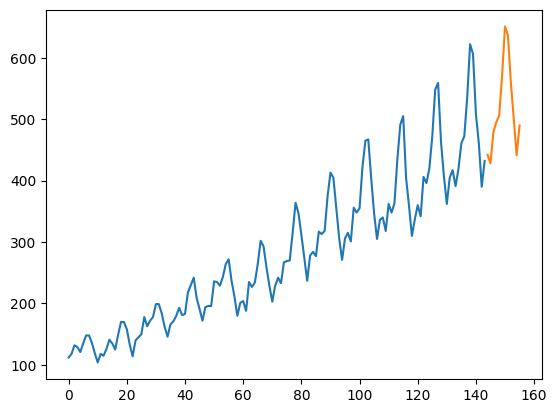

In [23]:
data_air=data.set_index('month')
plt.plot(np.arange(144), data_air)
plt.plot(np.arange(144, 144+12), forecast)
plt.show()

# **Darts**

Darts is a Python library intended for the facile manipulation and prediction of time series, which was created by Unit8. The proposition aimed to achieve a degree of user-friendliness in the handling of darts for time-series analysis on par with that of sklearn. The primary objective of Darts is to streamline the holistic methodology of leveraging time series in the context of machine learning. The game of darts is characterized by two primary models that are widely utilized in the prediction of its outcomes, namely the regression models, which predict the output based on input time, and the forecasting models, which predict future results based on past readings.

Darts boasts various intriguing attributes, such as -

The library provides assistance in performing analysis and modeling of both univariate and multivariate time series.
The process of testing models, amalgamating multiple predictions, and taking into account external data is a facile task.

Furthermore, it offers flexibility in terms of customization and optimization, making it suitable for a wide range of applications. It possesses a capacity for efficient processing of sizable datasets and features an array of models that span from traditional ARIMA frameworks to more complex deep neural networks. Additionally, its malleability and potential for optimization render it suitable for various applications with diverse requirements.

Networks can be employed in a similar fashion as the sklearn library, thereby utilizing the fit() and predict() functions.

In [27]:
#Loading the package
from darts import TimeSeries
from darts.models import ExponentialSmoothing

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(data, 'month', '#Passengers')

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [28]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

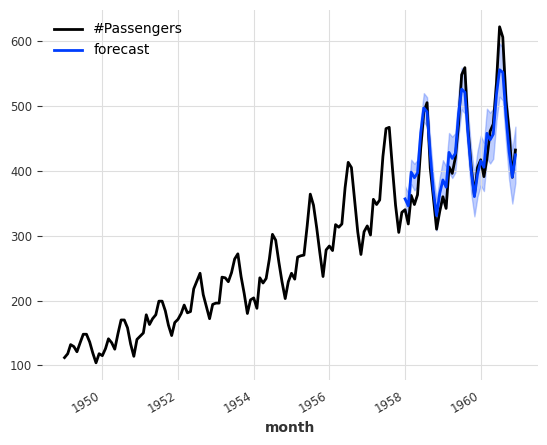

In [29]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()